In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

What is machine learning? Where and why 
you will use machine learning? 

Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at 
predicting outcomes without being explicitly programmed to do so
We can use machine learning applicatiuons where we cannot hard code the rules. Example, if we were tasked with segregating 
emails as either spam of ham, we can not hard code the algorithm since it requires a level of analysis. Also, if we have a million 
emails that need to be labeled, we cnat manually do it. Hence, we need an machine learning algorithm to categorize it as spam or 
ham.

What is normalization and why do you 
perform? Explain with examples. How do you  
perform it? 

__Ans.__ Normalization is an data preperation technique. We use it to transform the data/columns in a data set to the same scale. This ensures that we are getting the results in the same scale and that we give equal importance to all the features when performing machine learning predictions. 

__Example:__
If we take features such as height and income, since these 2 features are measuring in a different way in that the former is measured in centimeters or meters. On the other hand, income can be either measured in dollars or other currencies depending on the country of origin of the amount. Therefore, when we are dealing with machine learning, we should ensure that importance is not given to one feature while neglecting the other. We would be hence performing normalization. 

Min-max normalization: We take the minimum value of a particular feature and we subtract it from all the other values in our feature. We divide this result with the difference between the maximum value and the minimum value to get the normalized results.

Standardization: There is a second way in which we can perform normalization. We take the standard deviation of each feature and we take the mean of a particular feature. We subtract each value from a feature with the mean and divide the result with the standard deviation of this feature to get normalized results. 

Mean Normalization: We take the mean value of a particular feature and we subtract it from all the other values in our feature. We divide this result with the difference between the maximum value and the minimum value to get the normalized results.

What is supervised and unsupervised 
learning? Give some examples 

Supervised learning is the learning algorithm performed on labeled dataset. Unsupervised is performned on unlabled dataset. 
Examples of supervised learning:

    1) Weather to give a loan or not based on previous data. Here, we provide labled data to the algorithm for the applications that were 
        approved for loan and for those that were not. The algorithm will predict if an applicant is eligible for the loan.
Unsupervised learning: Unsupervised Learning is performed on datasets that do not contain any labels or explicit instructions
    on what to do with it. The goal is for the learning algorithm to find structure in the input data on its own.
    Examples:
    
    1) Clustering based on customer segmentation. We would be segmenting the customers in applications such as e-commerce where the behavior of the customers is segmentated and understood based on their interests. We would classify the customers based on their user behavior with the aid of unsupervised machine learning (clustering). After successfully clustering, we can give offers to various customers depending on their interests. 

In [78]:
#Change the path of the file location appropriately

df = pd.read_csv("WorldRecords_1.csv",encoding = 'latin')

In [79]:
'''  
Q1 print the basic information about the data set
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Event        285 non-null    object 
 1   Type         285 non-null    object 
 2   Record       285 non-null    float64
 3   Athlete      285 non-null    object 
 4   Nationality  285 non-null    object 
 5   Location     285 non-null    object 
 6   Year         285 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 15.7+ KB


In [80]:
'''
Q2 How many different types of events (e.g. “Mens 100m”, “Womens shotput” etc) are represented in the dataset
'''
df['Event'].value_counts() # number of people in each event

Mens Polevault     55
Womens Shotput     41
Mens Shotput       39
Mens Mile          32
Womens 800m        29
Mens TripleJump    25
Mens 800m          24
Mens 100m          17
Womens Mile        13
Womens 100m        10
Name: Event, dtype: int64

In [90]:
len(df.groupby('Event')['Record'].mean().index)

10

In [10]:
'''
Q3. In what year did Usain Bolt first break the world record for the Men’s 100m?

'''

df[(df['Event']=='Mens 100m') & (df['Athlete']=='Usain Bolt')]['Year'].min()

2008

In [11]:
'''
Q4.Create a subset of the dataset that contains only the world record cases for men’s shotput and women’s shotput

'''

df1=df[(df['Event']=='Mens Shotput') | (df['Event']=='Womens Shotput')]

In [12]:
df1

,Event,Type,Record,Athlete,Nationality,Location,Year
205,Mens Shotput,distance,17.68,Charlie Fonville,USA,"Lawrence, U.S.",1948
206,Mens Shotput,distance,17.79,Jim Fuchs,USA,"Oslo, Norway",1949
207,Mens Shotput,distance,17.82,Jim Fuchs,USA,"Los Angeles, U.S.",1950
208,Mens Shotput,distance,17.90,Jim Fuchs,USA,"Visby, Sweden",1950
209,Mens Shotput,distance,17.95,Jim Fuchs,USA,"Eskilstuna, Sweden",1950
...,...,...,...,...,...,...,...
280,Womens Shotput,distance,22.36,Ilona Slupianek,GDR,"Celje, Yugoslavia",1980
281,Womens Shotput,distance,22.45,Ilona Slupianek,GDR,"Potsdam, East Germany",1980
282,Womens Shotput,distance,22.53,Natalya Lisovskaya,URS,"Sochi, Soviet Union",1984
283,Womens Shotput,distance,22.60,Natalya Lisovskaya,URS,"Moscow, Soviet Union",1987


Text(0.5, 1.0, 'Mens Shotput')

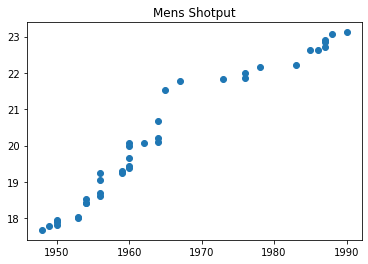

In [13]:
'''
Q5 Create a scatter plot of the year and record shotput distance one for men and one for women.

'''
df1=df[(df['Event']=='Mens Shotput')]
plt.scatter(x=df1['Year'], y=df1['Record'])
plt.title('Mens Shotput')

Text(0.5, 1.0, 'Womens Shotput')

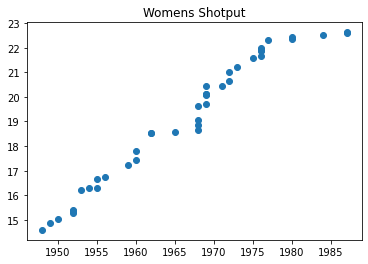

In [14]:
df2=df[(df['Event']=='Womens Shotput')]
plt.scatter(x=df2['Year'], y=df2['Record'])
plt.title('Womens Shotput')

In [43]:
'''
Q6 Find the average/mean  time for each event. How many athletes have time more than average in each event.

'''
df.groupby(['Event'])['Record'].mean() #the mean time for each event

Event
Mens 100m            9.848824
Mens 800m          105.345833
Mens Mile          237.493750
Mens Polevault       5.608909
Mens Shotput        20.194872
Mens TripleJump     16.671200
Womens 100m         10.880000
Womens 800m        127.851724
Womens Mile        263.653846
Womens Shotput      19.139756
Name: Record, dtype: float64

In [67]:
df_event_grouped = df.groupby(['Event'])['Record'].mean().to_frame()
df_merged = df.merge(df_event_grouped, how = 'left', on = 'Event')
df_merged[df_merged['Record_x'] > df_merged['Record_y']].groupby(by = 'Event')['Record_x'].count()
#the number of people that are above mean for each event

Event
Mens 100m           9
Mens 800m          10
Mens Mile          15
Mens Polevault     31
Mens Shotput       16
Mens TripleJump    12
Womens 100m         6
Womens 800m        13
Womens Mile         5
Womens Shotput     21
Name: Record_x, dtype: int64

In [11]:
'''
Q7 Select the athlete who took most time in men’s 100m  and women’s event.
'''
print(df[(df['Event']=='Mens 100m')][['Athlete','Record']].max()) #hghest in men 100m
print(df[(df['Event']=='Womens 100m')][['Athlete','Record']].max()) #highest in womens 100m

Athlete    Usain Bolt
Record          10.06
dtype: object
Athlete    Wyomia Tyus
Record           11.07
dtype: object


In [66]:
'''
Q8 Which country won maximum times of men’s 100m event?
'''
df[df['Event'] == 'Mens 100m']['Nationality'].value_counts().index[0]

'United States'

In [13]:
'''
Q9 How many athletes are there in each event?

'''
df.groupby(['Event'])['Athlete'].count()

Event
Mens 100m          17
Mens 800m          24
Mens Mile          32
Mens Polevault     55
Mens Shotput       39
Mens TripleJump    25
Womens 100m        10
Womens 800m        29
Womens Mile        13
Womens Shotput     41
Name: Athlete, dtype: int64